# **CO2 Regression analysis on 86 countries and UK’s Forecast Analysis, leveraging records from the vast majority of countries worldwide.**

###**A Machine Learning Project**
####by Fabian Chukwunonso Umeh
   ***
##**Phase 3: Predictive analysis with Random Forest, Decision Tree, KNN and Multi-Layer Perceptrons (MLP)**
***
### **Phase 3 Notebook Content:**
 1. Project Overview
 2. Notebook setup - Libraries and data imports
 3. Handling Outlier from previous analysis
 4. Data Overview
 5. Dimensionality Reduction and multicollinearity solutions
 6. Splitting the dataset
  - Feature importance
 7. Model Design
 8. Conclusions and Foundation for further research


***
###**1. Project Overview**
***
Industrialization and Human Emission of carbon-di-oxide are among the key drivers of climate change.
***
**Aim of project:** Analysis of country specific record in desinging machine learning models for prediction and Forcast of CO2 emmision, leveraging records from vast majority of countries worldwide including:

- Annual production of coal from different sources like coal and cement
- population
- Econimic indicator - GDP
- Emissions from oil
- etc
***
The project is sub-divided into four phases:
1. Data cleaning and preparation
2. Data Visualization and Exploration
3. Predictive analysis with 
  - Random Forest algorithm
  - k-nearest neighbors algorithm
  - Decision Trees learning algorithm
  - multilayer perceptron(Neural network model)
4. Forcast analysis:
 - Univariate
 - Multi-variate

**Each phase is analysed on a different Notebook(.ipynp file).**
***
 A special aknowledgement to **Vladislav Todorov** whose work flow methodology has been adopted.
***
### **Notebook summary - Phase 3: Predictive analysis with Random Forest, Decision Tree, KNN and Multi-Layer Perceptrons (MLP)**
***
**Aim of this notebook:** The goal of this particular notebook is perform to analysis to create a suitable model to predict co2 given some predefined parameters, we will compare the results of the aforementioned algorithms and pick only the best.

**Input:** CSV (comma separated values) file of Cleaned data from Phase 1.

**Output:** Predictive model

**Programming language:** Python 3.7

**Libraries used in this notebook:** sklearn, pandas, numpy, math, random, matplotlib and seaborn.

**External package to be installed:** None.

***
### **Data source**
The used data stems from the Co2 and greenhouse gas emissions by Our World In Data. It includes data on CO2 emissions (annual, per capita, cumulative and consumption-based), other greenhouse gases, energy mix, and other relevant metrics. __[Here](https://github.com/owid/co2-data)__ is the link to the dataset

**Note:** The dataset is updated regularly and may differ slightly with the one used for this analysis.
***
### **2. Notebook setup - Libraries and data imports**
***
Importing Libraries:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy.random as nr #for random seed
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection as fs
from sklearn import model_selection as ms
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from math import sqrt
import warnings 
warnings.filterwarnings('ignore')
import random
#for maintaining randomness
random_state = 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# define file name
file_name = "Cleaned_data.csv"

# read file from csv to pandas DataFrame
data = pd.read_csv(file_name)


### **3. Handling outlier from previous analysis**

In [ ]:
#Select relevant features from previous analysis
final_data = data[['country','year','co2','coal_co2','cement_co2','gas_co2','oil_co2','methane','population','gdp']]

In [ ]:
#Remove Outliers (countries) with significantly  high range features
final_data = final_data[final_data['country'].isin(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Bulgaria', 'Cameroon', 'Canada', 'Chile', 'Colombia', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic',
       'Egypt', 'Estonia', 'Finland', 'France', 'Georgia', 'Ghana',
       'Greece', 'Guatemala', 'Hungary', 'Iceland', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyzstan',
       'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg',
       'Malaysia', 'Mexico', 'Moldova', 'Morocco', 'Mozambique',
       'Netherlands', 'New Zealand', 'North Macedonia', 'Norway',
       'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Rwanda', 'Senegal', 'Serbia', 'Slovakia', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Syria',
       'Tajikistan', 'Tanzania', 'Thailand', 'Tunisia', 'Turkey',
       'Turkmenistan', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Yemen'])]

In [ ]:
print('For the predictive analysis, only the {} countries above were considered \
'.format(len(final_data['country'].unique())))

For the predictive analysis, only the 86 countries above were considered 


### **4. Data Overview**

In [ ]:
print('Shape of current cleaned data:')
final_data.shape

Shape of current cleaned data:


(2580, 10)

In [ ]:
print('Columns and thier data types')
final_data.dtypes

Columns and thier data types


country        object
year            int64
co2           float64
coal_co2      float64
cement_co2    float64
gas_co2       float64
oil_co2       float64
methane       float64
population    float64
gdp           float64
dtype: object

In [ ]:
print('Data preview')
final_data.head()

Data preview


,country,year,co2,coal_co2,cement_co2,gas_co2,oil_co2,methane,population,gdp
0,Afghanistan,1991,2.427,0.249,0.046,0.388,1.718,9.07,13299016.0,1.204736e+10
1,Afghanistan,1992,1.379,0.022,0.046,0.363,0.927,9.00,14485543.0,1.267754e+10
2,Afghanistan,1993,1.333,0.018,0.047,0.352,0.894,8.90,15816601.0,9.834581e+09
3,Afghanistan,1994,1.282,0.015,0.047,0.338,0.860,8.97,17075728.0,7.919857e+09
4,Afghanistan,1995,1.230,0.015,0.047,0.322,0.824,9.15,18110662.0,1.230753e+10


In [ ]:
print('data statistics:')
final_data.describe()

data statistics:


,year,co2,coal_co2,cement_co2,gas_co2,oil_co2,methane,population,gdp
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2.580000e+03,2.580000e+03
mean,2005.500000,94.802117,24.710678,3.044875,24.468796,40.262161,27.364767,1.923039e+07,3.149758e+11
std,8.657119,134.255760,49.876768,4.928337,40.084596,58.616590,33.472301,2.182666e+07,4.791190e+11
min,1991.000000,0.455000,0.001000,0.001000,0.000000,0.366000,0.510000,2.576160e+05,4.238311e+09
25%,1998.000000,10.347250,0.264000,0.430500,0.736000,6.262000,5.140000,4.628765e+06,3.538952e+10
50%,2005.500000,42.678000,3.566500,1.194000,6.329000,19.116000,12.555000,1.004494e+07,1.198025e+11
75%,2013.000000,109.046500,23.419750,3.204500,27.566750,41.930750,37.887500,2.674010e+07,3.490121e+11
max,2020.000000,671.631000,340.348000,37.272000,229.267000,291.123000,187.380000,1.289328e+08,2.581674e+12


A pairplot of selected features before dimention reduction


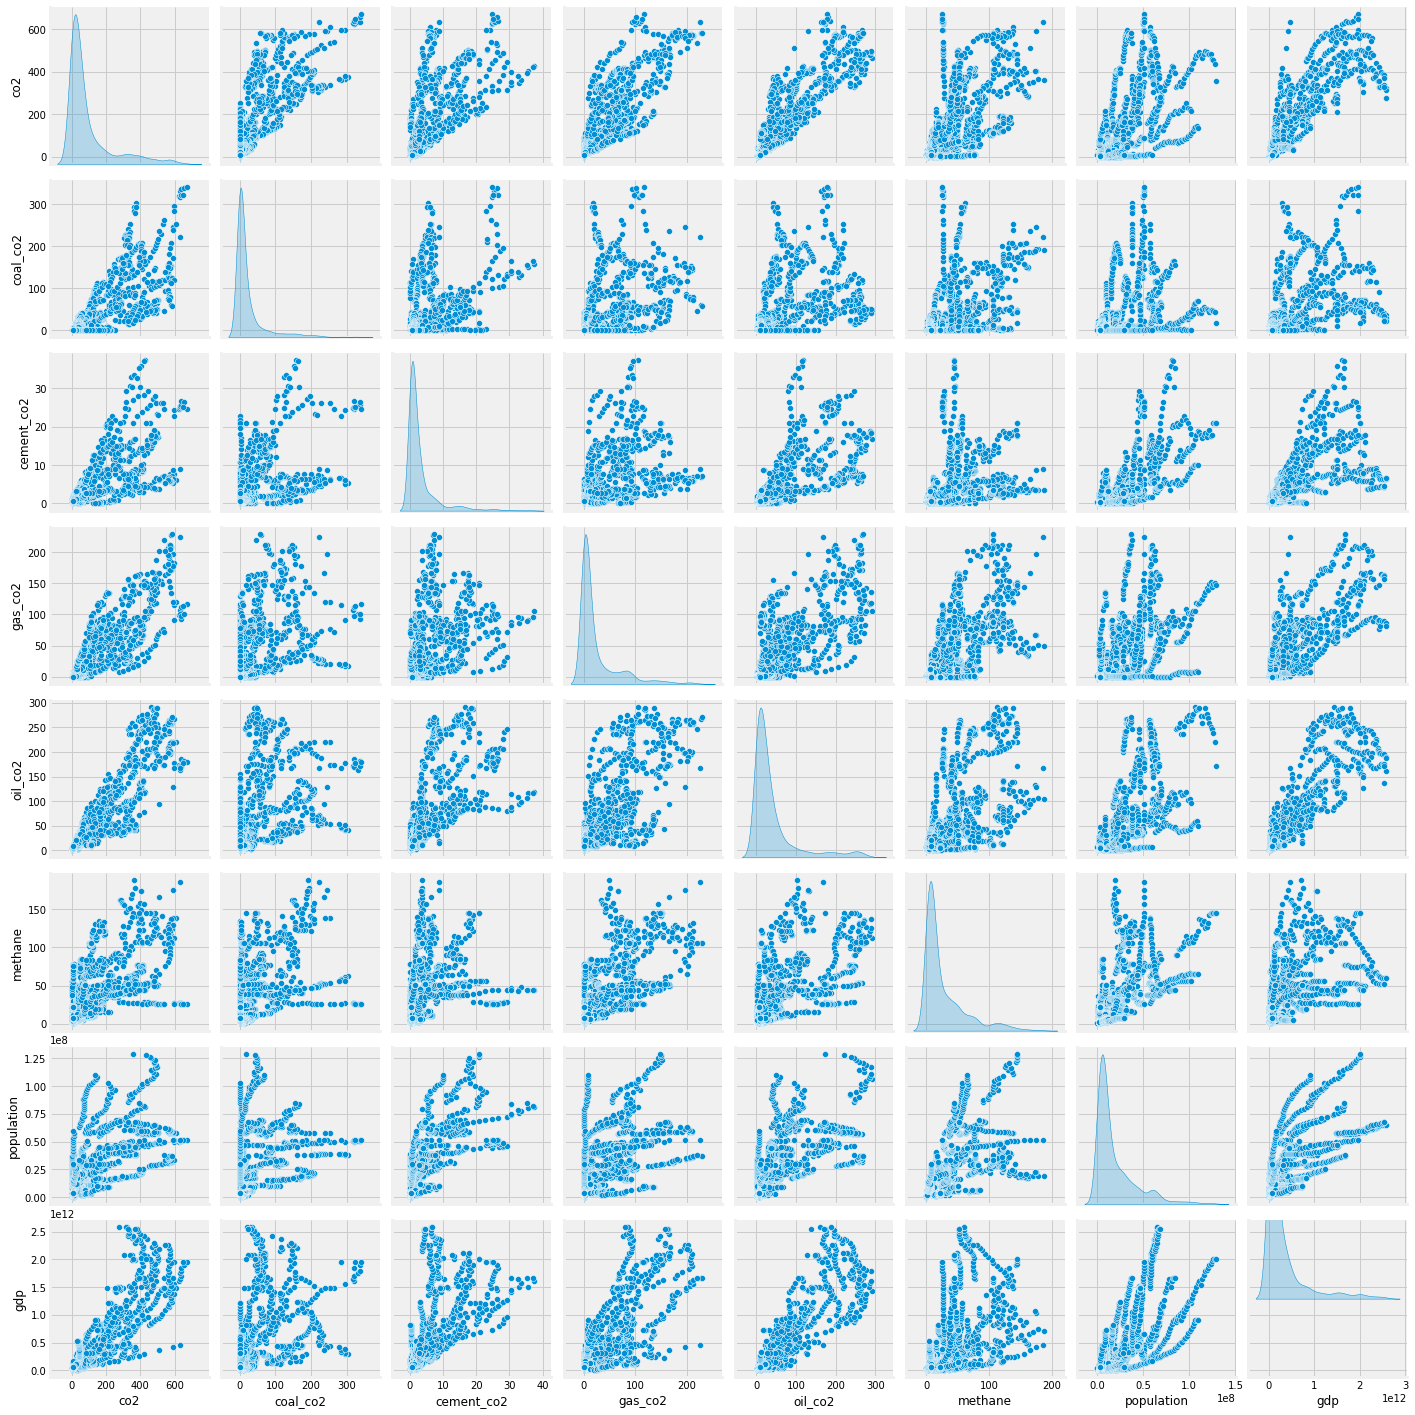

In [ ]:
print('A pairplot of selected features before dimention reduction')
sns.pairplot(final_data[['co2', 'coal_co2', 'cement_co2', 'gas_co2', 'oil_co2', 'methane', 'population', 'gdp']],
             diag_kind="kde")

### **5. Dimentionality Reduction and multicollinearity solutions**
- Since coal, oil, gas and cement co2 are multicolinear, we will add them up and make use of only the resultant added value.
- More so, we will get the gdp per capita by dividing the gdp by the population.
This is to ensure that there is no multicolinearity in our features and also that the dimensions too are thus reduced.

In [ ]:
#dimensionality reduction
final_data['ccgo'] = final_data['cement_co2'] + final_data['gas_co2'] + final_data['oil_co2'] + final_data['coal_co2']
final_data['gdp_per_capita'] = final_data['gdp'] / final_data['population']
final_data.head()

,country,year,co2,coal_co2,cement_co2,gas_co2,oil_co2,methane,population,gdp,ccgo,gdp_per_capita
0,Afghanistan,1991,2.427,0.249,0.046,0.388,1.718,9.07,13299016.0,1.204736e+10,2.401,905.883692
1,Afghanistan,1992,1.379,0.022,0.046,0.363,0.927,9.00,14485543.0,1.267754e+10,1.358,875.185599
2,Afghanistan,1993,1.333,0.018,0.047,0.352,0.894,8.90,15816601.0,9.834581e+09,1.311,621.788531
3,Afghanistan,1994,1.282,0.015,0.047,0.338,0.860,8.97,17075728.0,7.919857e+09,1.260,463.807877
4,Afghanistan,1995,1.230,0.015,0.047,0.322,0.824,9.15,18110662.0,1.230753e+10,1.208,679.573506


In [ ]:
data = final_data.drop(['cement_co2','gas_co2','oil_co2','coal_co2','gdp','population'],axis=1)
data.head()

,country,year,co2,methane,ccgo,gdp_per_capita
0,Afghanistan,1991,2.427,9.07,2.401,905.883692
1,Afghanistan,1992,1.379,9.00,1.358,875.185599
2,Afghanistan,1993,1.333,8.90,1.311,621.788531
3,Afghanistan,1994,1.282,8.97,1.260,463.807877
4,Afghanistan,1995,1.230,9.15,1.208,679.573506


#### **5.1 Cross checking multicolinearity with Variance inflator factor**

In [ ]:
# rechecking the Variance infllator factor for multicolinearity
X = data.drop(['co2','country'], axis=1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)
print('\nThis indicates the absence of multicolinearity in our dataset')

          feature       VIF
0            year  2.974294
1         methane  3.419944
2            ccgo  3.405321
3  gdp_per_capita  2.781385

This indicates the absence of multicolinearity in our dataset



***
#### **6. Splitting the dataset into training and test data**

In [ ]:
ft_cols = ['year','methane','ccgo','gdp_per_capita']
lb_col = ['co2']

features = np.array(data[ft_cols])
label = np.array(data[lb_col]).ravel()

#Data splitting using sklearn train_test_split function
ft_train,ft_test,lb_train,lb_test = ms.train_test_split(features,label,test_size=0.3
                                                     ,shuffle = True, random_state= random_state)

scaler = StandardScaler()
scaler.fit(ft_train)

ft_train_s = scaler.fit_transform(ft_train)
ft_test_s = scaler.transform(ft_test)

#### **6.1 Checking feature importance**

In [ ]:
# Set 8 folds for cross validation for the feature selection
nr.seed(5)
folds = ms.KFold(n_splits=8, shuffle = True, random_state=random_state)

# Define the model
RFR_selector = RandomForestRegressor(random_state=random_state) 

# Define an objects for a model for RFECV (recursive feature elimination with CV)
nr.seed(5)
selector = fs.RFECV(estimator = RFR_selector, cv = folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(ft_train, np.ravel(lb_train))

# print the important features and thier rank
ranks = list(np.transpose(selector.ranking_))
selected_features = [i for i,j in zip(ft_cols,ranks) if j==1]

print("Feature ranking after RFECV:")
print(selector.ranking_)

print("Selected features:")
print(selected_features)

print('This denotes that all features are important')

Feature ranking after RFECV:
[1 1 1 1]
Selected features:
['year', 'methane', 'ccgo', 'gdp_per_capita']
This denotes that all features are important


### **7. Model Design**

#### **7.1 Using KNN**

In [ ]:
nr.seed(5)

KNR = KNeighborsRegressor()

k_parameters = {'n_neighbors': np.arange(1,40,1)}
KNR_cv_model = ms.GridSearchCV(KNR, k_parameters, cv = 5)

#Fitting the KNR model to the dataset
KNR_cv_model.fit(ft_train_s, lb_train)

#Best parameters
KNR_cv_model.best_params_

{'n_neighbors': 2}

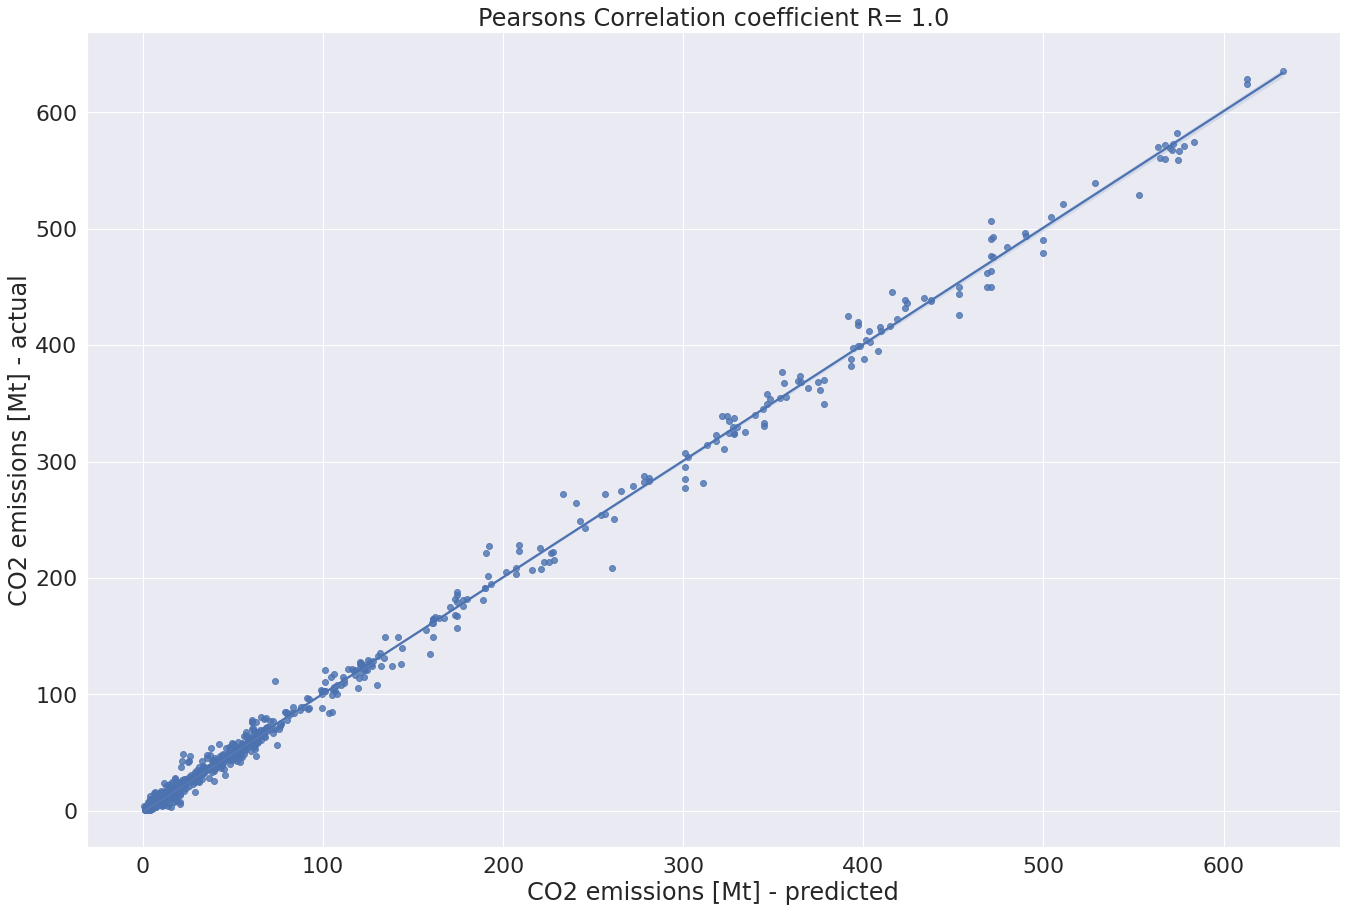

In [ ]:
# Tuned model
KNR_tuned = KNR_cv_model.best_estimator_
# plot predicted vs actual values
predictions = KNR_tuned.predict(ft_test_s)
f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(lb_test), fit_reg=True)
plt.xlabel("CO2 emissions [Mt] - predicted")
plt.ylabel("CO2 emissions [Mt] - actual")
plt.title("Pearsons Correlation coefficient R= {}".format(round(np.corrcoef(predictions,np.transpose(lb_test))[0,1],2)))
plt.show()

In [ ]:
# Model Evaluation
test = lb_test
predictions = KNR_tuned.predict(ft_test_s)
print('Tuned KNeighborsRegressor')

KNN_MAE = mean_absolute_error(test, predictions)
print('MAE : {}'.format(KNN_MAE))
KNN_MSE = mean_squared_error(test, predictions)
print('MSE : {}'.format(KNN_MSE))
KNN_RMSE = sqrt(KNN_MSE)
print('RMSE : %f' % KNN_RMSE)
KNN_R2_score = r2_score(test, predictions)
print('R2_score : {}'.format(KNN_R2_score))
frame = pd.DataFrame()
frame['test'] = test
frame['predictions'] = predictions


Tuned KNeighborsRegressor
MAE : 4.779703488372093
MSE : 58.24951544864342
RMSE : 7.632137
R2_score : 0.9970013978210334


#### **7.2 Using Random Forest**

In [ ]:
RFR = RandomForestRegressor(random_state = 42)
RFR_params = {'max_depth': list(range(1,10)),'max_features': [3],'n_estimators' : [10,20,30,40]}
# Getting the best parameter using Grid Search
RFR_model = ms.GridSearchCV(RFR,RFR_params,cv = 5, n_jobs = -1,verbose = 2)
RFR_model.fit(ft_train_s, lb_train)
#Best parameters
RFR_model.best_params_ 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'max_depth': 9, 'max_features': 3, 'n_estimators': 40}

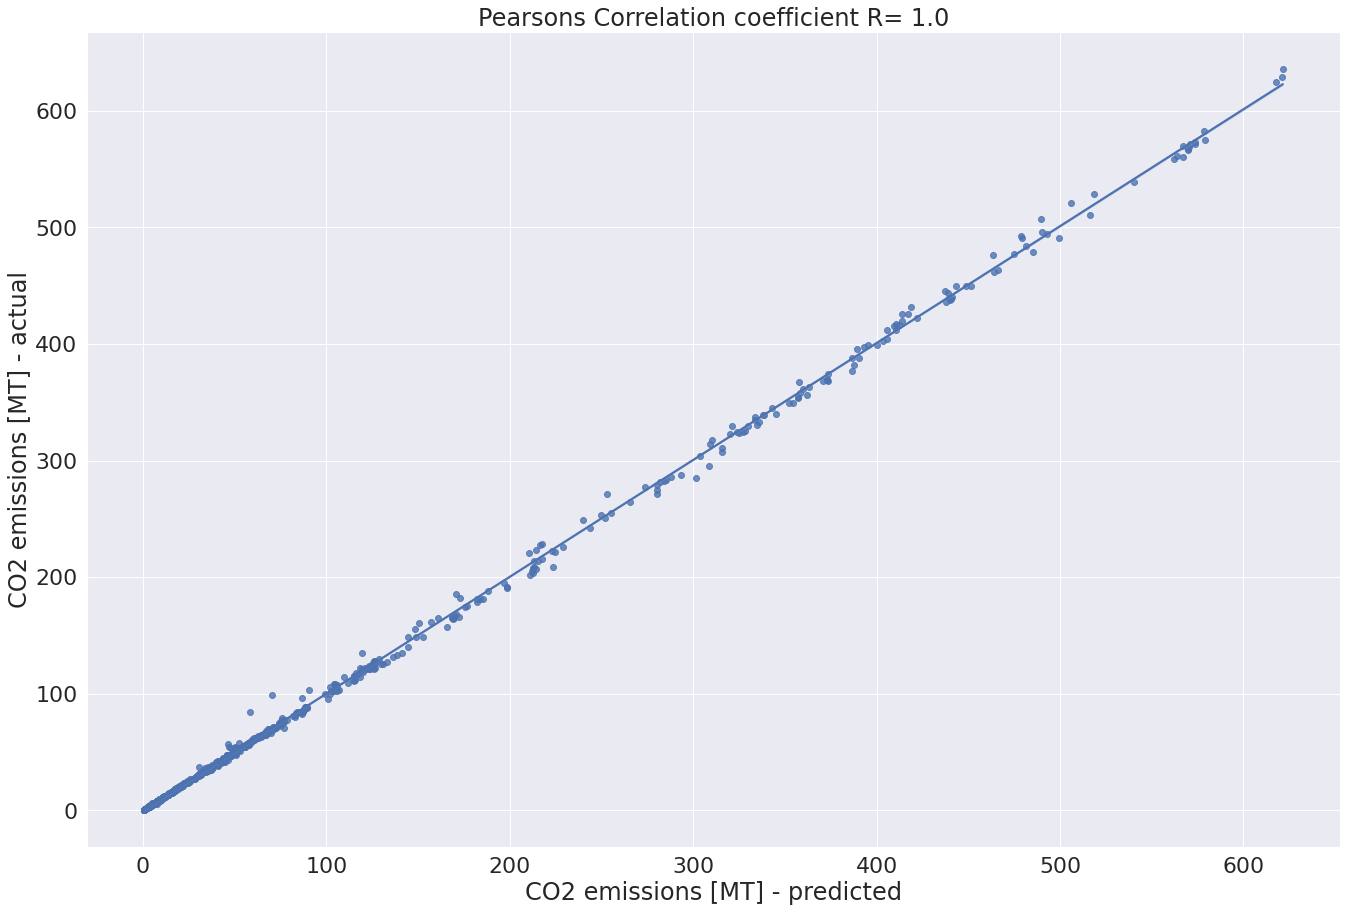

In [ ]:
RFR_tuned = RFR_model.best_estimator_
# plot predicted vs actual values
predictions1 = RFR_tuned.predict(ft_test_s)
f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions1, y=np.transpose(lb_test), fit_reg=True)
plt.xlabel("CO2 emissions [MT] - predicted")
plt.ylabel("CO2 emissions [MT] - actual")
plt.title("Pearsons Correlation coefficient R= {}".format(round(np.corrcoef(predictions1,np.transpose(lb_test))[0,1],2)))
plt.show()

In [ ]:
# Model Evaluation
test = lb_test
predictions1 = RFR_tuned.predict(ft_test_s)
print('Tuned Random Forest')

RF_MAE = mean_absolute_error(test, predictions1)
print('MAE : {}'.format(RF_MAE))
RF_MSE = mean_squared_error(test, predictions1)
print('MSE : {}'.format(RF_MSE))
RF_RMSE = sqrt(RF_MSE)
print('RMSE : %f' % RF_RMSE)
RF_R2_score = r2_score(test, predictions1)
print('R2_score : {}'.format(RF_R2_score))
frame = pd.DataFrame()
frame['test'] = test
frame['predictions'] = predictions1

Tuned Random Forest
MAE : 1.6877422263669306
MSE : 12.08510653208905
RMSE : 3.476364
R2_score : 0.9993778759101933


#### **7.3 Using Decision Tree**

In [ ]:
#initialize DecisionTreeRegressor algorithm
DTR_model = DecisionTreeRegressor()

#Using Grid Search to determine best parameter
param_grid = {"criterion": ["squared_error", "absolute_error"],
              "min_samples_split": [1,2,5,7,10,12],
              "max_depth": [2,3,4,6,8,9],
              "min_samples_leaf": [2,3,4,6,9,10],
              "max_leaf_nodes": [2,3,5,6,9],
              }
dtr_cv_model = ms.GridSearchCV(DTR_model,param_grid=param_grid,cv=5)
# Fit the model
dtr_cv_model.fit(ft_train_s, lb_train)
#Best parameters
dtr_cv_model.best_params_ 

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

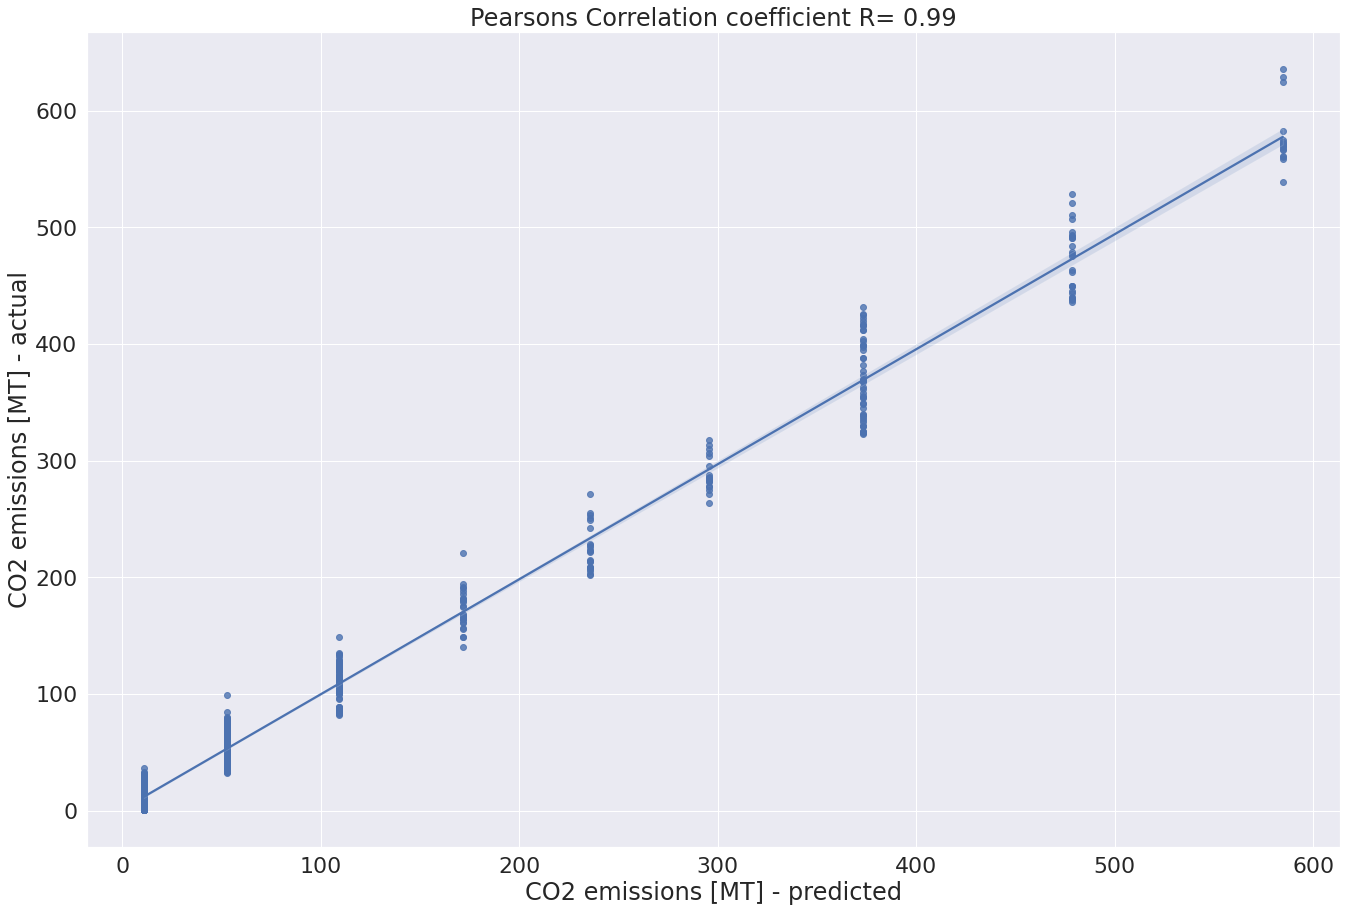

In [ ]:
DTR_tuned = dtr_cv_model.best_estimator_
# plot predicted vs actual values
predictions2 = DTR_tuned.predict(ft_test_s)
f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions2, y=np.transpose(lb_test), fit_reg=True)
plt.xlabel("CO2 emissions [MT] - predicted")
plt.ylabel("CO2 emissions [MT] - actual")
plt.title("Pearsons Correlation coefficient R= {}".format(round(np.corrcoef(predictions2,np.transpose(lb_test))[0,1],2)))
plt.show()

In [ ]:
# Model Evaluation
test = lb_test
predictions2 = DTR_tuned.predict(ft_test_s)
print('Tuned Decision Tree')

DT_MAE = mean_absolute_error(test, predictions2)
print('MAE : {}'.format(DT_MAE))
DT_MSE = mean_squared_error(test, predictions2)
print('MSE : {}'.format(DT_MSE))
DT_RMSE = sqrt(DT_MSE)
print('RMSE : %f' % DT_RMSE)
DT_R2_score = r2_score(test, predictions2)
print('R2_score : {}'.format(DT_R2_score))

Tuned Decision Tree
MAE : 11.527535293020419
MSE : 241.40108581888023
RMSE : 15.537087
R2_score : 0.987573015563029


#### **7.4 Using Multi-layer Perceptron**

In [ ]:
MLP = MLPRegressor(max_iter=500)
param_list = {"hidden_layer_sizes": [1,2,3,5,8], 
              "solver": ["lbfgs", "sgd", "adam"],
              }
MLP_CV = ms.GridSearchCV(estimator=MLP,cv=5, param_grid=param_list)

MLP_CV.fit(ft_train_s, lb_train)

#code to check for the best parameter
MLP_CV.best_params_

{'hidden_layer_sizes': 8, 'solver': 'lbfgs'}

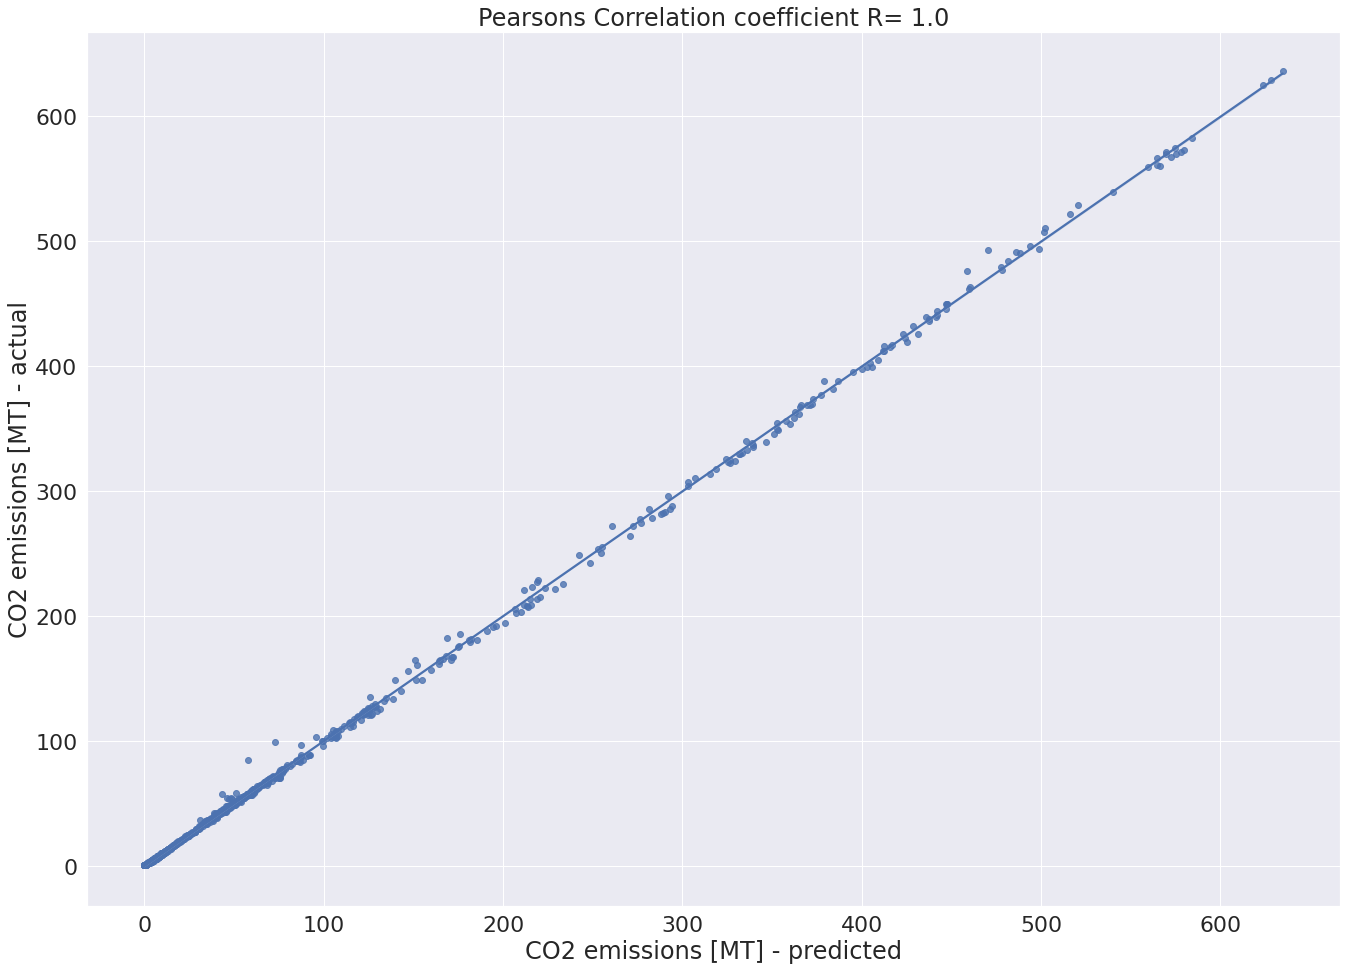

In [ ]:
MLP_tuned = MLP_CV.best_estimator_
# plot predicted vs actual values
predictions3 = MLP_tuned.predict(ft_test_s)
f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions3, y=np.transpose(lb_test), fit_reg=True)
plt.xlabel("CO2 emissions [MT] - predicted")
plt.ylabel("CO2 emissions [MT] - actual")
plt.title("Pearsons Correlation coefficient R= {}".format(round(np.corrcoef(predictions3,np.transpose(lb_test))[0,1],2)))
plt.show()

In [ ]:
# Model Evaluation
test = lb_test
predictions3 = MLP_tuned.predict(ft_test_s)
print('Tuned MLP')

MLP_MAE = mean_absolute_error(test, predictions3)
print('MAE : {}'.format(MLP_MAE))
MLP_MSE = mean_squared_error(test, predictions3)
print('MSE : {}'.format(MLP_MSE))
MLP_RMSE = sqrt(MLP_MSE)
print('RMSE : %f' % MLP_RMSE)
MLP_R2_score = r2_score(test, predictions3)
print('R2_score : {}'.format(MLP_R2_score))
frame = pd.DataFrame()
frame['test'] = test
frame['predictions'] = predictions3

Tuned MLP
MAE : 1.539682397612799
MSE : 9.199127874852243
RMSE : 3.033006
R2_score : 0.999526441985351


In [ ]:
#Summary of model scores from different metrics
KNN_model = KNN_MAE,KNN_MSE,KNN_RMSE,KNN_R2_score
RF_model = RF_MAE,RF_MSE,RF_RMSE,RF_R2_score
DT_model = DT_MAE,DT_MSE,DT_RMSE,DT_R2_score
MLP_model = MLP_MAE,MLP_MSE,MLP_RMSE,MLP_R2_score

summary = pd.DataFrame([KNN_model,RF_model,DT_model,MLP_model],
                       index = ['KNN','RF','DT','MLP'], 
                       columns = ['MAE','MSE','RMSE','R2_score'])
summary

,MAE,MSE,RMSE,R2_score
KNN,4.779703,58.249515,7.632137,0.997001
RF,1.687742,12.085107,3.476364,0.999378
DT,11.527535,241.401086,15.537087,0.987573
MLP,1.539682,9.199128,3.033006,0.999526


Text(0.5, 1.0, 'Mean absolute error of models [MT]')

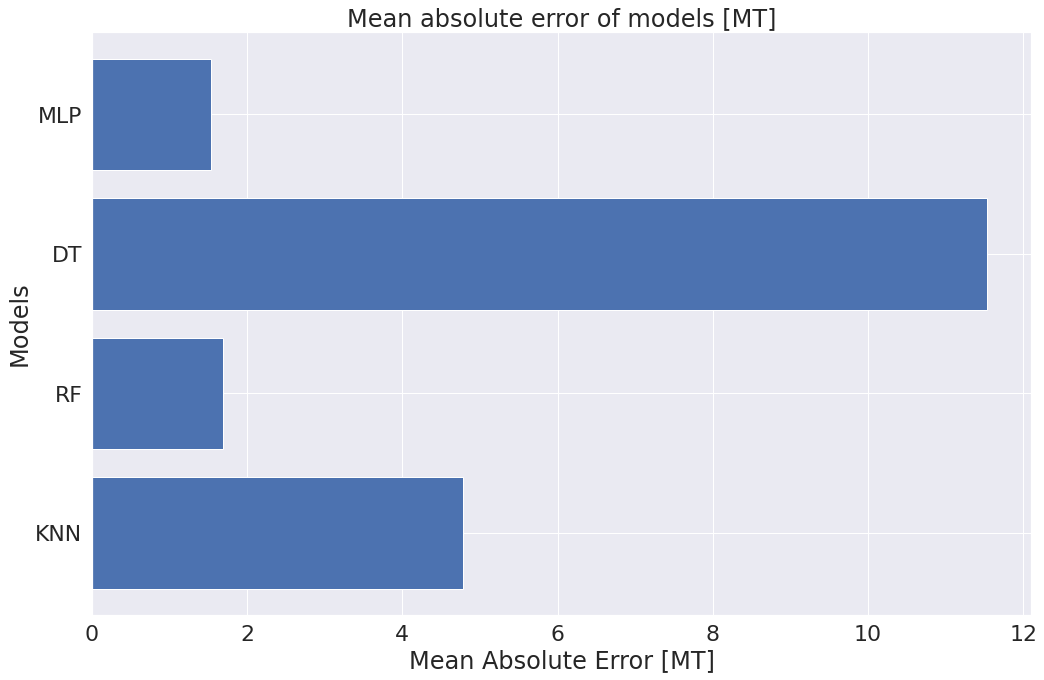

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(width = summary['MAE'], y = summary.index)
plt.xlabel("Mean Absolute Error [MT]")
plt.ylabel("Models")
plt.title("Mean absolute error of models [MT]")

Text(0.5, 1.0, 'Mean Squared Error of models [MT]')

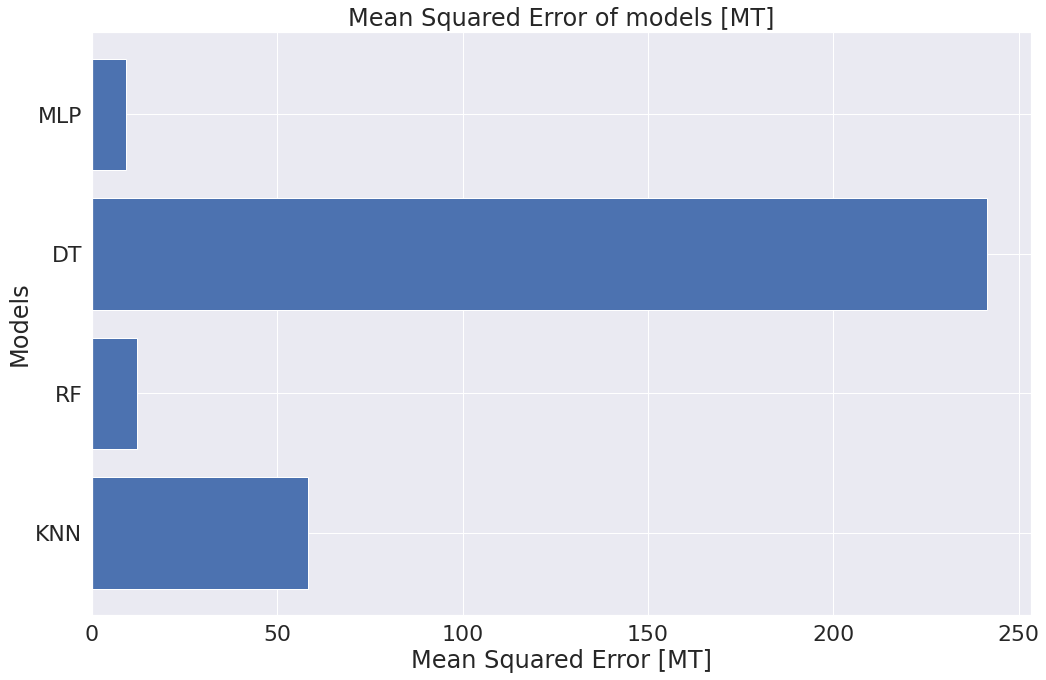

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(width = summary['MSE'], y = summary.index)
plt.xlabel("Mean Squared Error [MT]")
plt.ylabel("Models")
plt.title("Mean Squared Error of models [MT]")

Text(0.5, 1.0, 'Root Mean Squared Error of models [MT]')

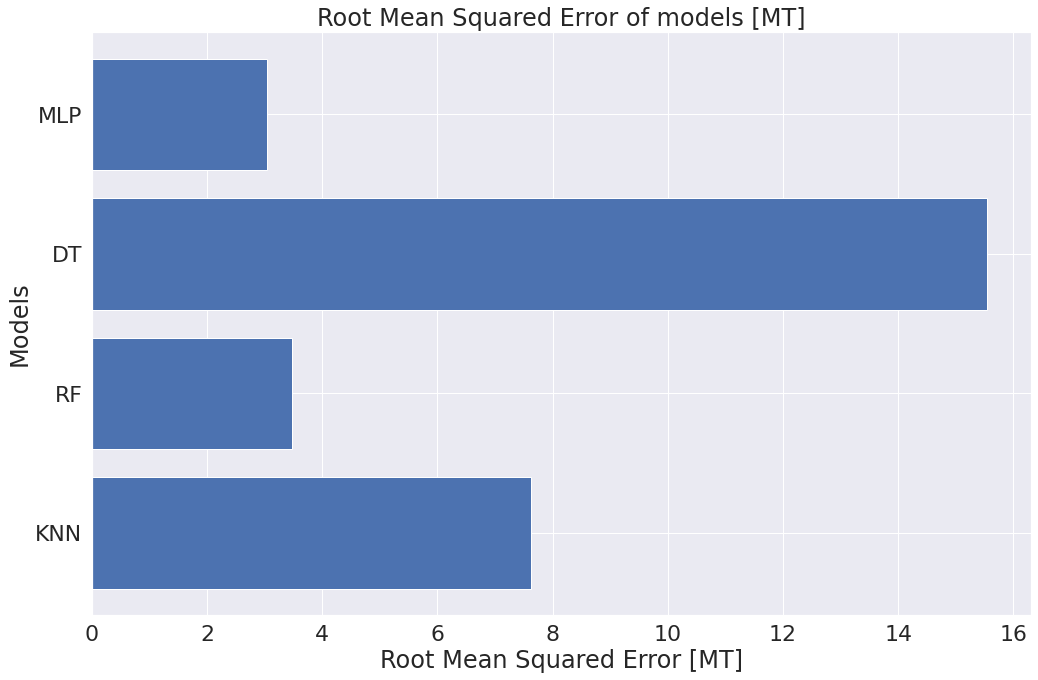

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(width = summary['RMSE'], y = summary.index)
plt.xlabel("Root Mean Squared Error [MT]")
plt.ylabel("Models")
plt.title("Root Mean Squared Error of models [MT]")

Text(0.5, 1.0, 'Accuracy of models')

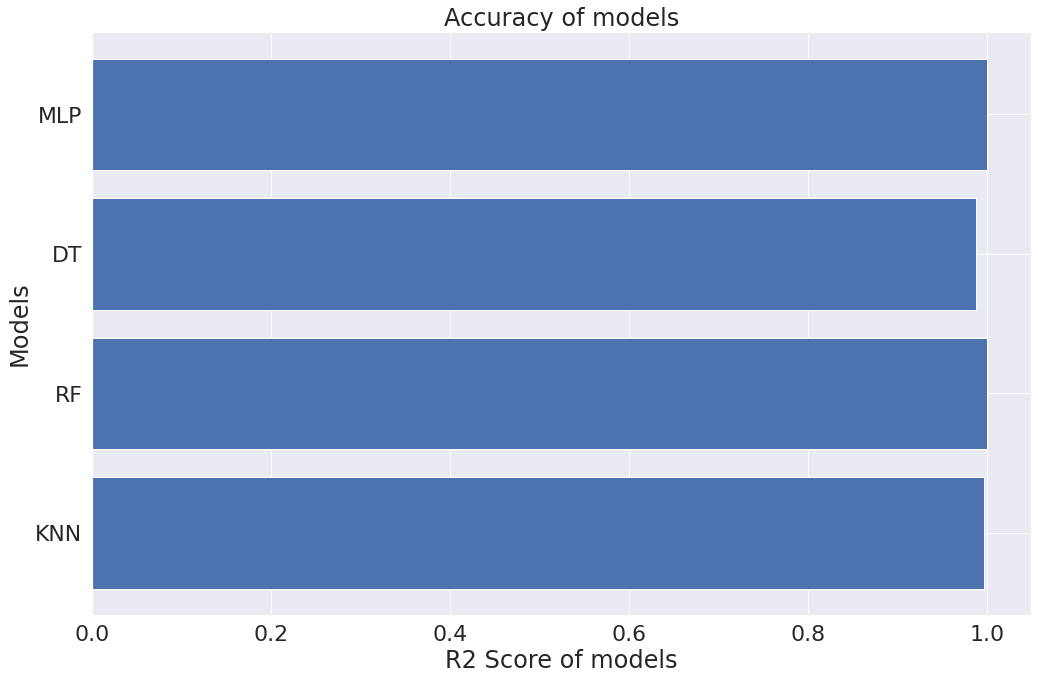

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(width = summary['R2_score'], y = summary.index)
plt.xlabel("R2 Score of models")
plt.ylabel("Models")
plt.title("Accuracy of models")

### **8. Conclusions and Foundation for further analysis**
***
After analysis the country data has almost been split into two. The further analysis will need to be performed for the other countries not included in the analysis. The number of countries used for this analysis were 86.
***